In [1]:
# # !pip install pandas openpyx
# # !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# !pip install plotly
# !pip install scikit-learn

In [2]:
# !pip install xgboost
# !pip install imbalanced-learn

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime, timedelta
import openpyxl
import xgboost as xgbgit


In [4]:
df = pd.read_excel("/Users/viren_emmanuel/Desktop/Data/industrial_copper_modeling/Copper_Set.xlsx")

In [5]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [6]:
# verify the number of unique value in each features
for i in list(df.columns):
    print(f"{i}: {df[i].nunique()}")

id: 181671
item_date: 252
quantity tons: 181673
customer: 1169
country: 17
status: 9
item type: 7
application: 30
thickness: 594
width: 1386
material_ref: 16563
product_ref: 33
delivery date: 28
selling_price: 9795


In [7]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
# Convert quantity tons to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

# Ensure dates are treated as strings to avoid float issues
df['item_date_1'] = df['item_date'].astype(str).str.replace('\.0$', '', regex=True)

df['delivery date_1'] = df['delivery date'].astype(str).str.replace('\.0$', '', regex=True)

# Convert to datetime with correct format
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

In [9]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [10]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [11]:
# Verify NaN values in 'Material_reference' after replacement in % 
print(np.round(df['material_ref'].isnull().mean()*100, 5),"% of missing values")

42.8897 % of missing values


In [12]:
df.drop(columns=['id', 'material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181672.0,20207381.557934,20190401.0,20201101.0,20210101.0,20210401.0,30310101.0,24110.589486
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [14]:
# Quantity tons and selling price values are not below 0. so we convert to null below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181672.0,20204588.226947,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.119094
quantity tons,181668.0,5875.066247,0.00001,10.971217,30.365013,67.161335,1000000000.0,2349107.102735
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181672.0,20207381.557934,20190401.0,20201101.0,20210101.0,20210401.0,30310101.0,24110.589486
selling_price,181665.0,1918.124252,0.1,669.0,812.0,953.0,100001015.0,331802.034663


In [15]:
# Checking the null values in this dataFrame:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery date_1     3
dtype: int64

In [16]:
df.dtypes

item_date                 float64
quantity tons             float64
customer                  float64
country                   float64
status                     object
item type                  object
application               float64
thickness                 float64
width                     float64
product_ref                 int64
delivery date             float64
selling_price             float64
item_date_1        datetime64[ns]
delivery date_1    datetime64[ns]
dtype: object

In [17]:
# Handling null values using median and mode
# identifying the object and numerical columns
object_columns = ['item_date','item_date_1','delivery date','delivery date_1','status']
numerical_columns = ['quantity tons','customer','country','application','thickness','selling_price']

In [18]:
# median - middle value in dataset (asc/desc), mode - value that appears most freqently in dataset
# Fill missing values in object columns with mode
for col in object_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# fill missing values in numerical columns with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)
df.isna().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [19]:
# Chicking for the unique values of all the columns:

for i in df.columns:
    print(i,":",df[i].nunique())

item_date : 252
quantity tons : 181669
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
product_ref : 33
delivery date : 28
selling_price : 9789
item_date_1 : 250
delivery date_1 : 26


In [20]:
for col in ['country','status','item type','application']:
    print(col,df[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [21]:
df['status'].unique()


array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [22]:
for col in ['status','item type']:
    print(df[col].value_counts())
    print('--'*20)
    

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
----------------------------------------
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
----------------------------------------


In [23]:
df['status'] = df['status'].str.strip()

In [24]:
# Convertca tegorical columns to numerical using OrdinalEncoder and using map method.
df['status'] = df['status'].map({'Lost': 0,'Won': 1,'Draft': 2,'To be approved': 3,
                                  'Not lost for AM': 4,'Wonderful': 5,'Revised': 6,'Offered': 7,'Offerable': 8})


df.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [25]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [26]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [27]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

# Skewness Handling - Feature Scaling(Log Transformation)

In [28]:
# Find outliers - box plot & skewes data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin plot for {column}')
    plt.show()

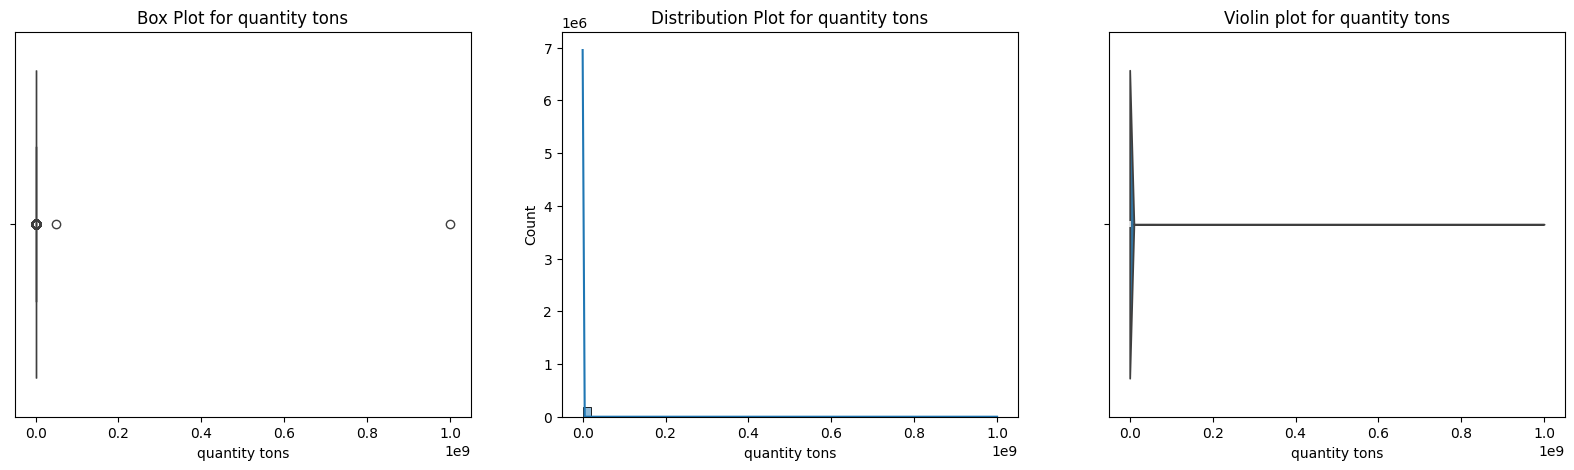

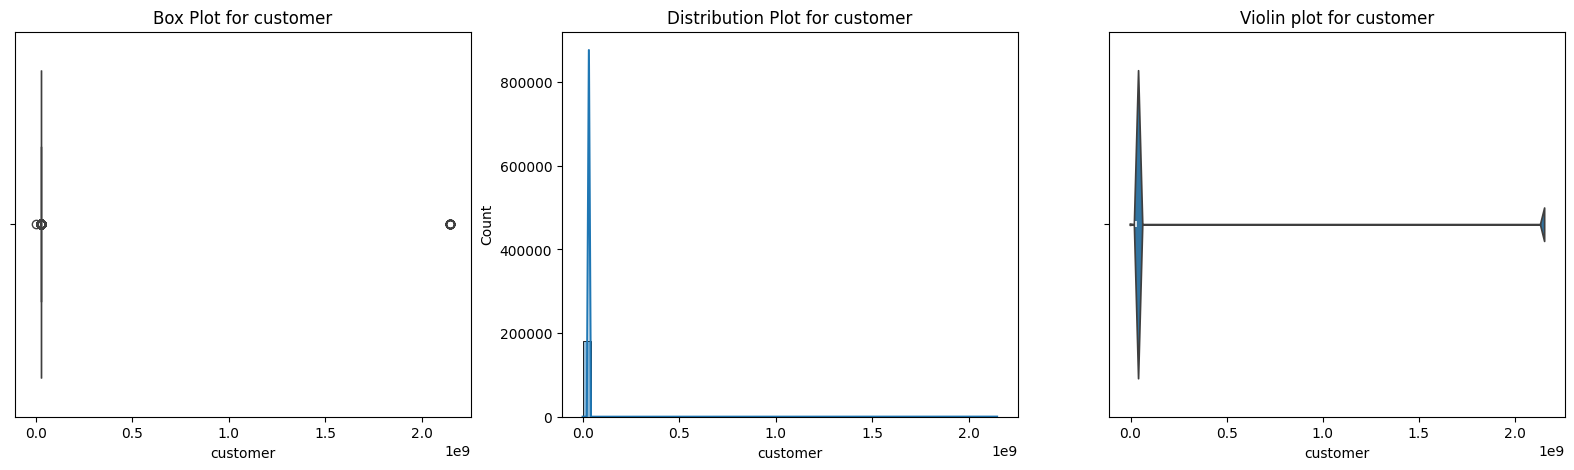

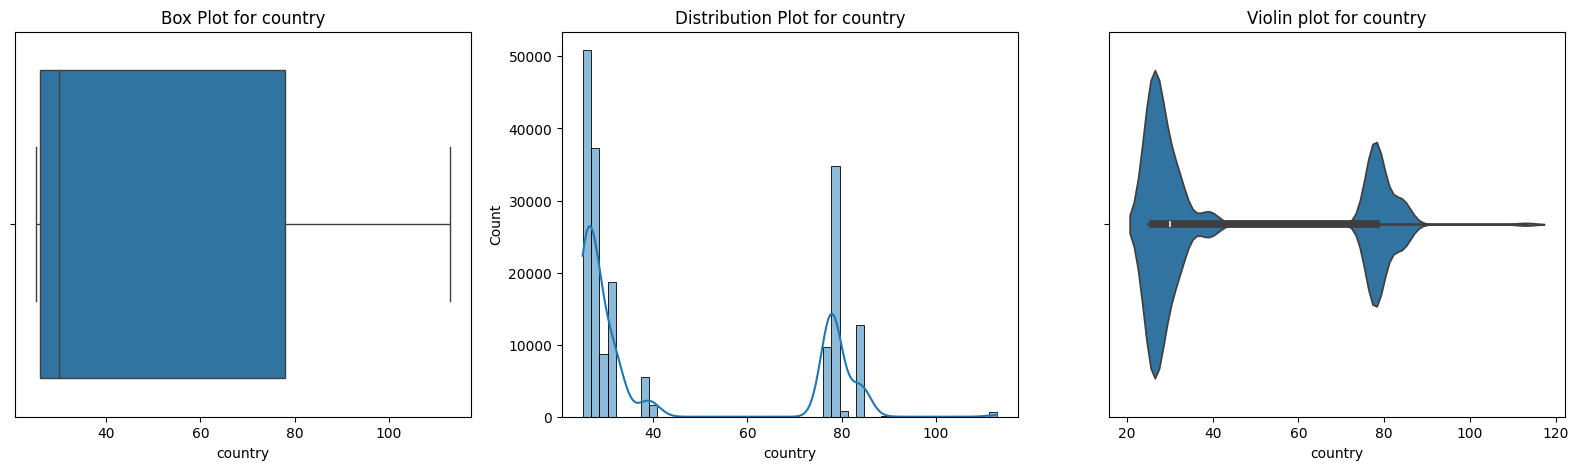

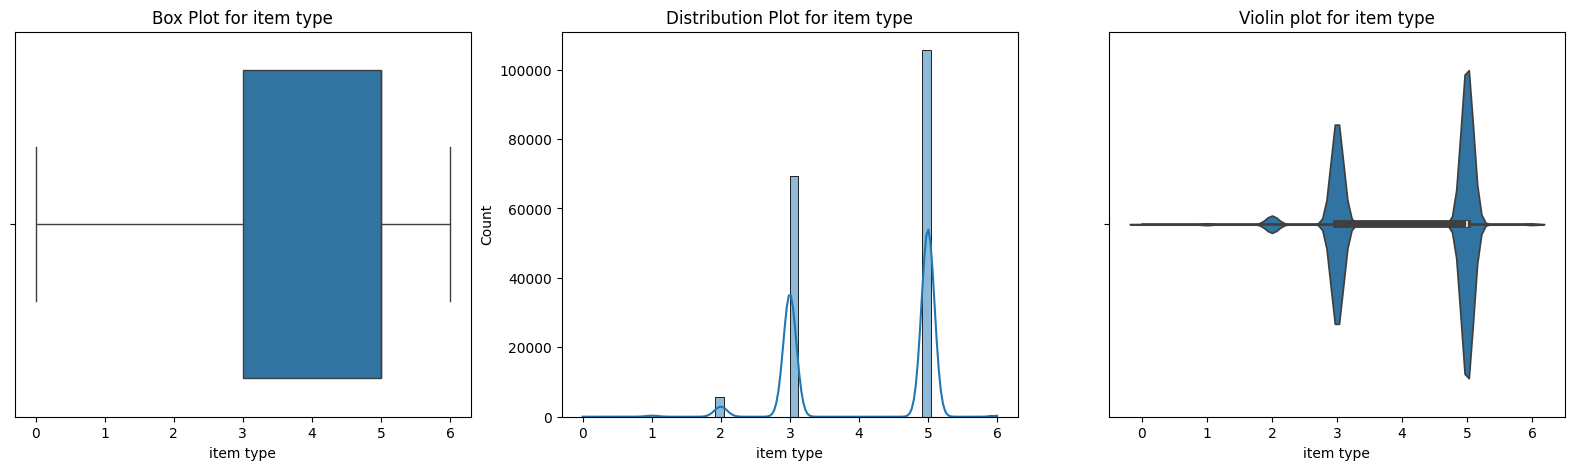

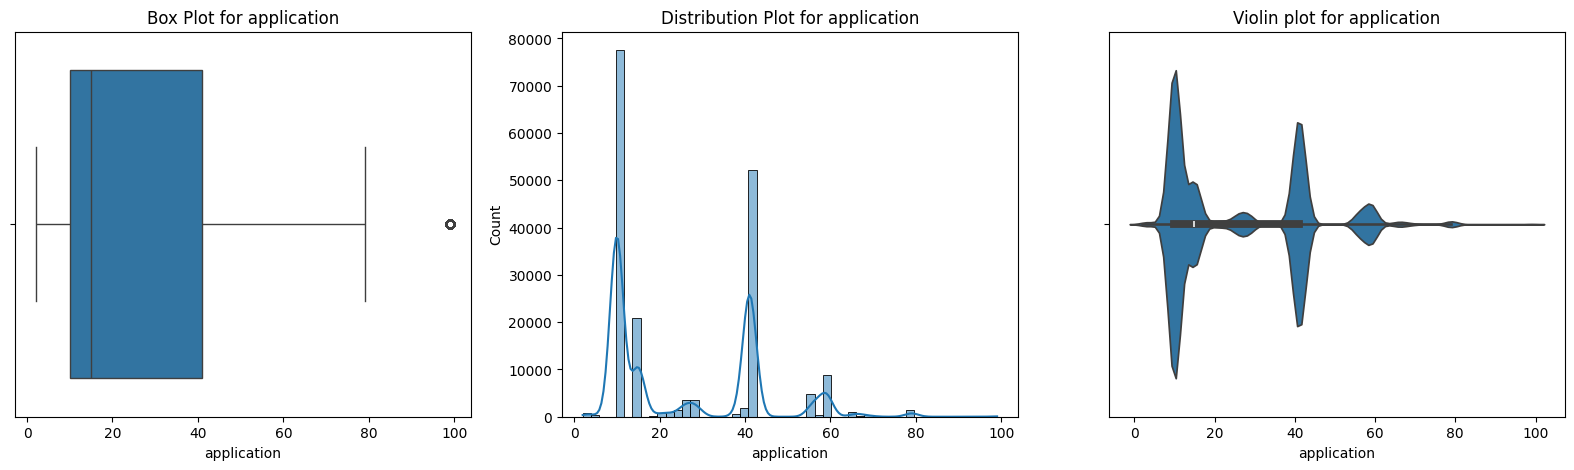

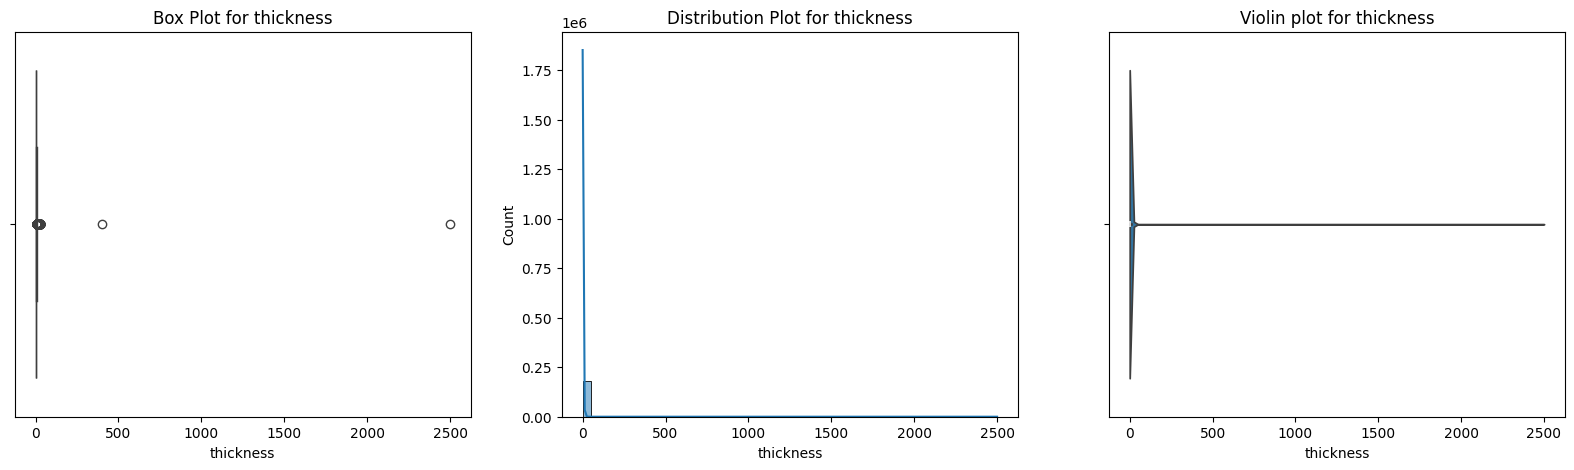

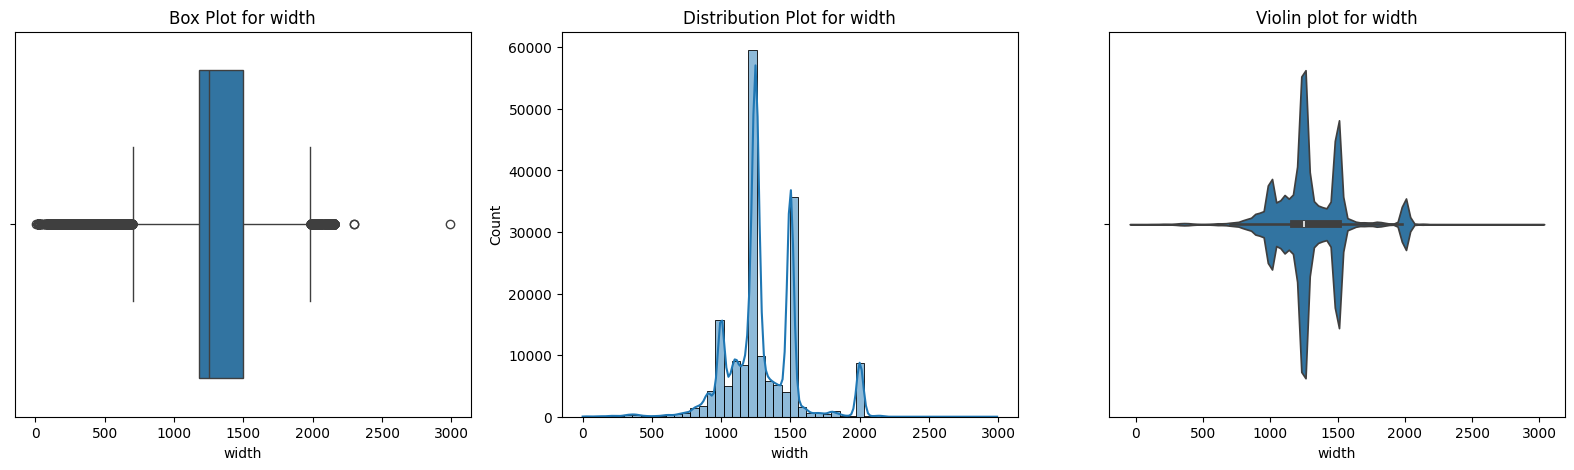

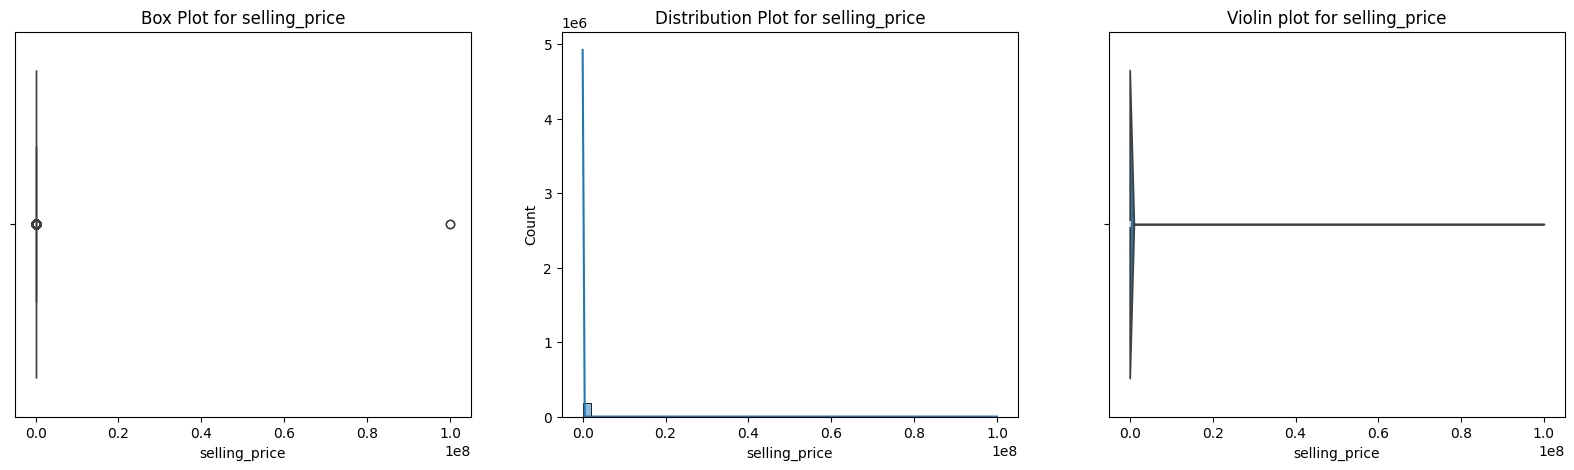

In [29]:
for i in ['quantity tons','customer','country','item type','application','thickness','width', 'selling_price']:
    plot(df, i)

In [30]:
# quantity tons, thickness and selling price data are skewed, so we will apply log transformation to these columns.
df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


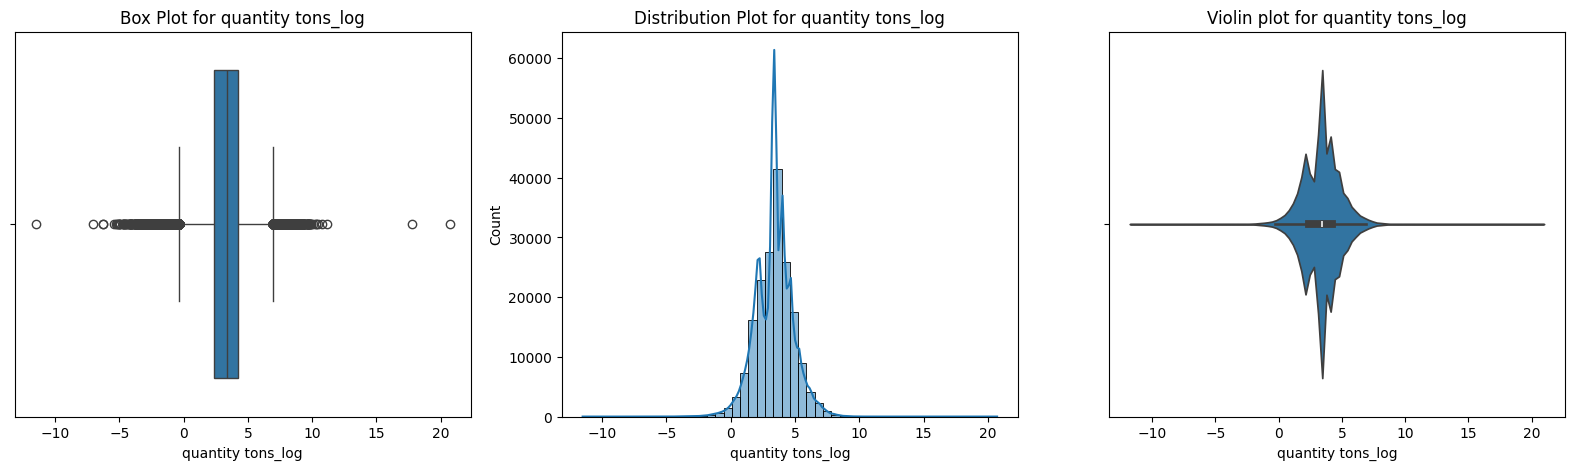

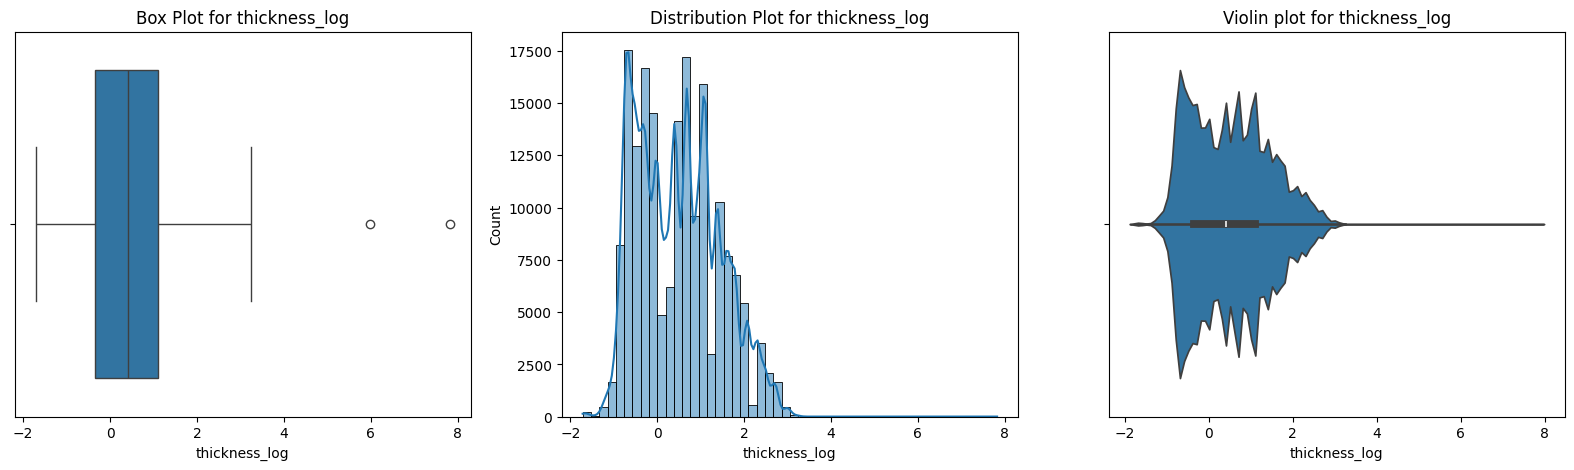

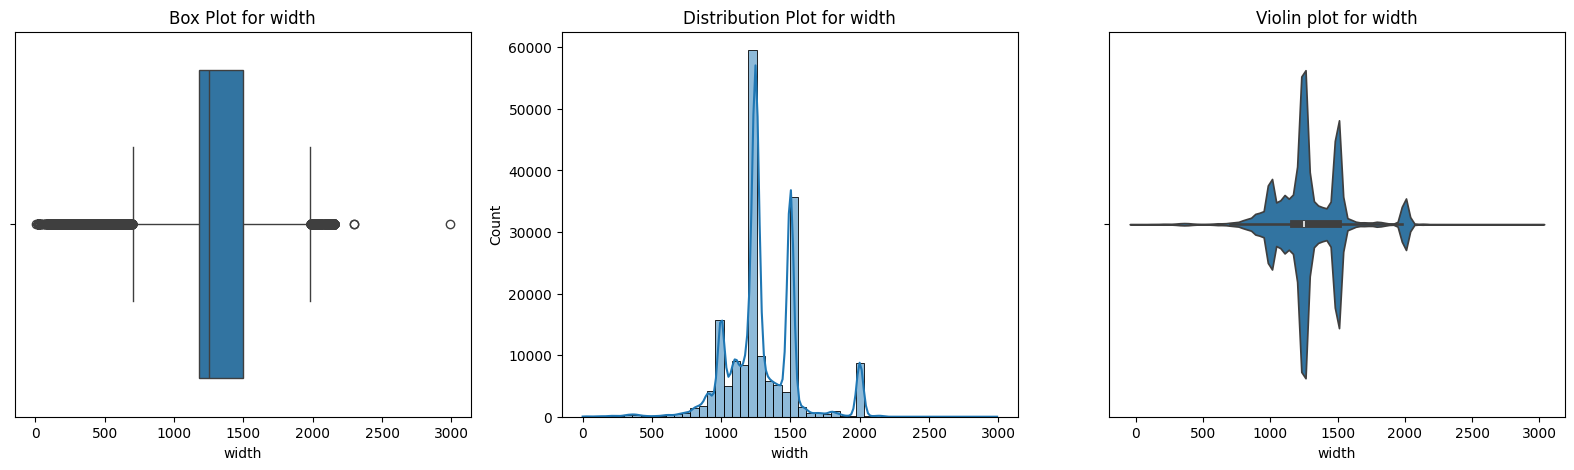

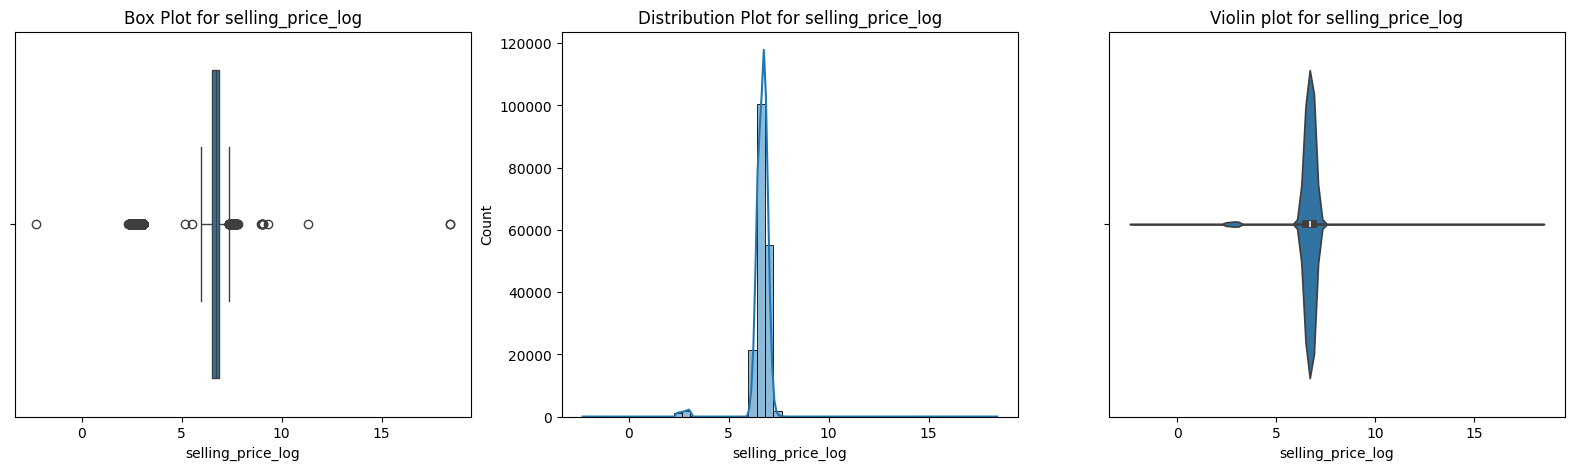

In [31]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log','thickness_log','width', 'selling_price_log']:
    plot(df1, i)

# Outleries Handling - InterquartileR ange (IQR) method

In [32]:
df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [33]:
# Using IQR and clip() methods to handle outliers and add a new column of DataFrame

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
    upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    

In [34]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# aboveu  pper threshold values (>20) are converted tou peer threshold value (20) in features
# below lower threshold values (<5) are converted to lower threshold value (5) in features

outlier(df2,'quantity tons_log')
outlier(df2,'thickness_log')
outlier(df2,'selling_price_log')
outlier(df2,'width')
df2


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


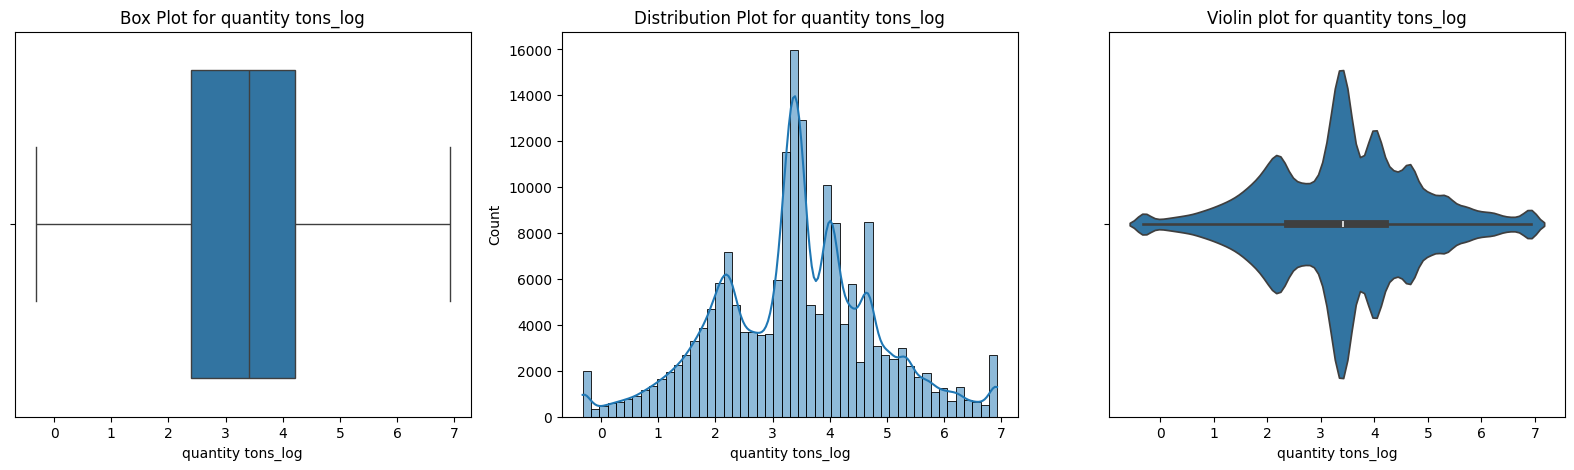

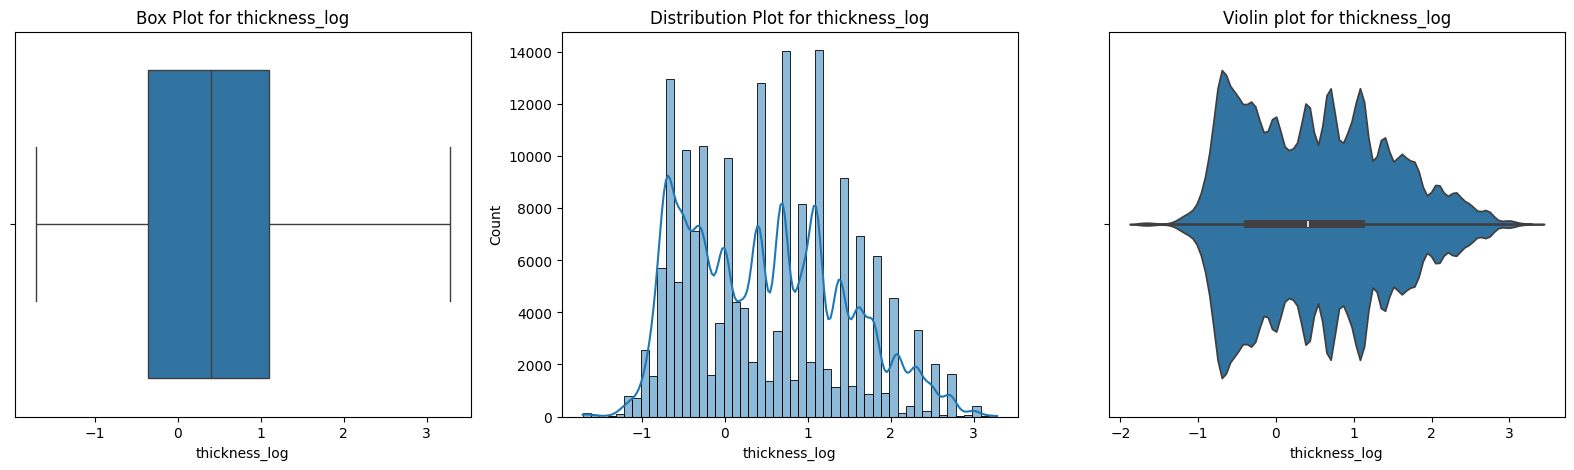

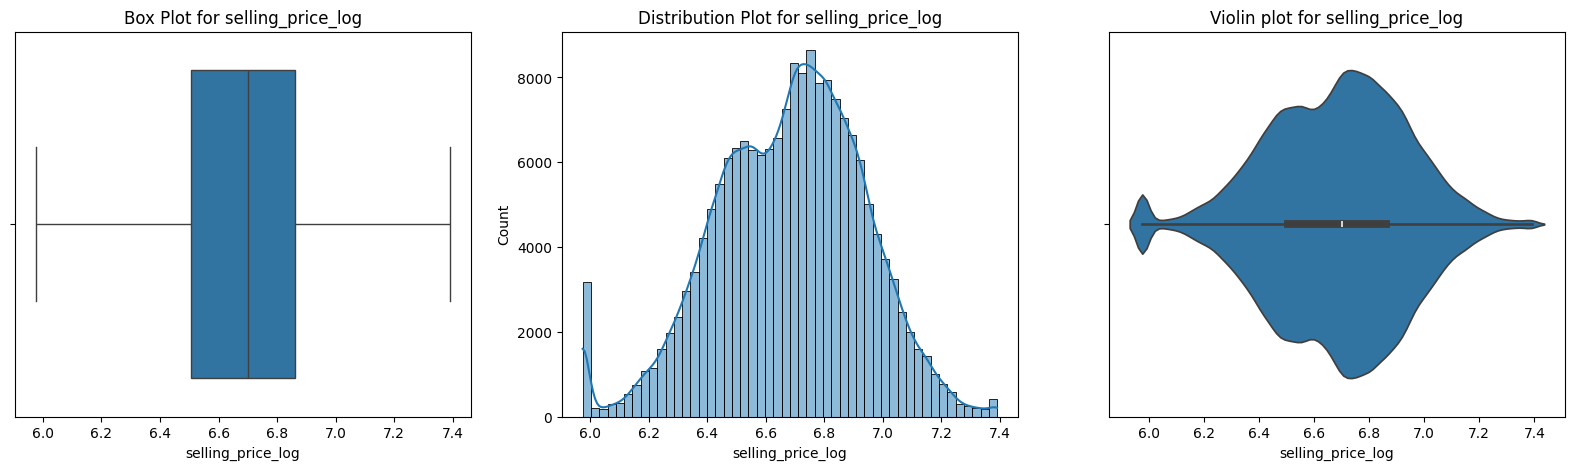

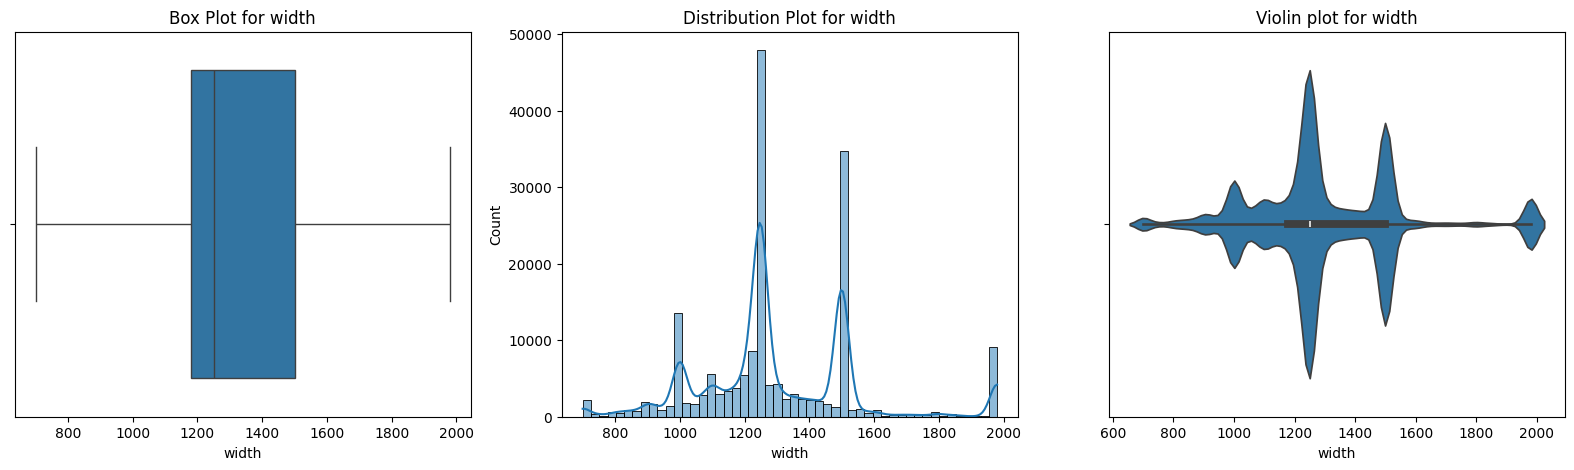

In [35]:
# Transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log','thickness_log','selling_price_log','width']:
    plot(df2, i)

In [36]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673.0,20204588.208308,19950000.0,20200929.0,20201130.0,20210203.0,20210401.0,4551.113503
quantity tons,181673.0,5874.905389,0.00001,10.971669,30.365013,67.160385,1000000000.0,2349074.7765
customer,181673.0,30512207.3383,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333748.622752
country,181673.0,44.890727,25.0,26.0,30.0,78.0,113.0,24.403034
status,181673.0,1.316684,0.0,1.0,1.0,1.0,8.0,1.33031
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181673.0,25.614406,2.0,10.0,15.0,41.0,99.0,17.753421
thickness,181673.0,2.564822,0.18,0.7,1.5,3.0,2500.0,6.572303
width,181673.0,1297.045583,700.0,1180.0,1250.0,1500.0,1980.0,248.961933
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


In [37]:
# After add the new columns of 'quantity tons_log', thickness_log','selling_price_log', and 'width', drop the existing columns of 'quantity tons', 'thickness', and 'selling_price' columns.
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


<Axes: >

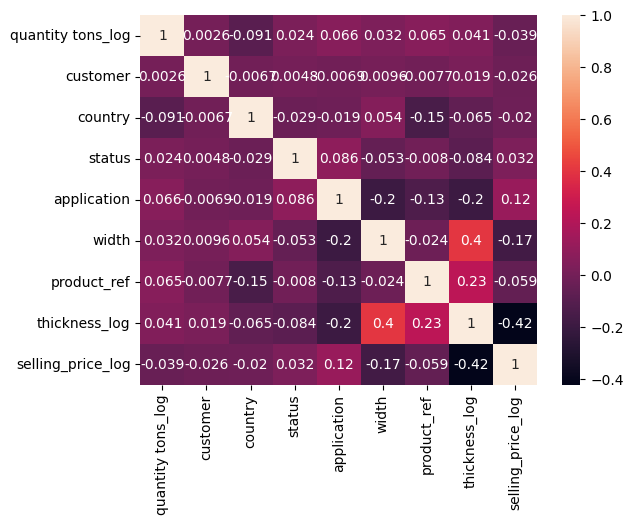

In [38]:
# Need to veryfy any columns are highly correlated using Heatmap. if any columns correlation value >= 0.7 (absolute value), drop the columns

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [39]:
# The highest value is (0.4 or -0.42) only, So there is no column are highly correelated and no need to drop any columns.

In [40]:
# After add the new columns of 'quantity tons_log', thickness_log','selling_price_log', and 'width', drop the existing columns of 'quantity tons', 'thickness', and 'selling_price' columns.
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


<Axes: >

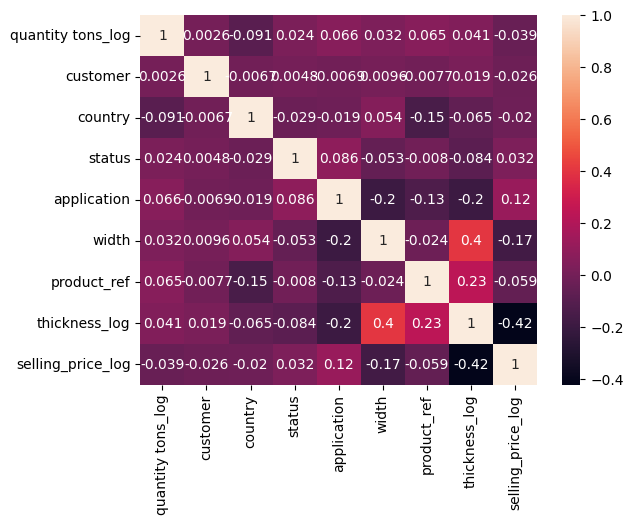

In [41]:
# Need to veryfy any columns are highly correlated using Heatmap. if any columns correlation value >= 0.7 (absolute value), drop the columns

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [42]:
# The highest value is (0.4 or -0.42) only, So there is no column are highly correelated and no need to drop any columns.

In [43]:
df4 = df3.copy()
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595


In [44]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.
# so finding the difference between 'delivery date' and 'item date' and adding a new column of 'delivery_date_diff' in df4 DataFrame.
df4['delivery_date_diff'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31


In [45]:
# Convert the dat type using pandas
df4['item_date_1'] = pd.to_datetime(df4['item_date_1'])

# split the day, month, and year from 'item_date_1' column and add dataframe (this dataframe is used for modeling)
df4['item_date_day'] = df4['item_date_1'].dt.day
df4['item_date_month'] = df4['item_date_1'].dt.month
df4['item_date_year'] = df4['item_date_1'].dt.year  
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [46]:
# split the non-negative value of 'Data_difference' column in separate dataFrame
df_f1 = df4[df4['delivery_date_diff'] >= 0]

# after split, the index values are unordered. so reset the index  to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,30227718.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30161559.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30161559.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,2.060514,6.126869,30,2,7,2020


In [47]:
# split the negative value of 'delivery_date_diff' column in another dataframe
df_f2 = df4[df4['delivery_date_diff'] < 0]
df_f2 = df_f2.reset_index(drop=True)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,-90,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,-31,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,-1,2,7,2020


In [48]:
# These 16108 values 'delivery date' are lesser than 'item date'.
# First we need to train the ML model using correct 'Delivery date' data (df_f1) and predict the 'dadelivery_date_diff' for 'df_f2' DataFrame. using ML model.

In [49]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [50]:
df_f1.columns

Index(['item_date', 'customer', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'delivery date', 'item_date_1',
       'delivery date_1', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'delivery_date_diff', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [51]:
# find best algorithm to prediction based on R2, meanabsolute error,mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date_1', 'delivery date_1', 'delivery_date_diff'], axis=1)
    y = df['delivery_date_diff']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    metrics = {'Algorithm': algorithm.__name__,
               'R2':r2,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}
    return metrics

In [52]:
print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))
print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9972860681233402, 'Mean Squared Error': 4.179959532509891, 'Root Mean Squared Error': np.float64(2.04449493335393)}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.999974933631316, 'Mean Squared Error': 0.03872622232959865, 'Root Mean Squared Error': np.float64(0.19678979223932996)}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999756103139874, 'Mean Squared Error': 0.03778029776824813, 'Root Mean Squared Error': np.float64(0.19437154567541035)}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7173216078698083, 'Mean Squared Error': 434.2020263825692, 'Root Mean Squared Error': np.float64(20.837514880200306)}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9869557782833552, 'Mean Squared Error': 20.32988903265699, 'Root Mean Squared Error': np.float64(4.508867821599674)}
{'Algorithm': 'XGBRegressor', 'R2': 0.9999150633811951, 'Mean Squared Error': 0.1312052458524704, 'Root Mean Squared Error': np.float64(0.3622226467967877)}


In [53]:
# Random forest algorithm is low bias and reduce overfitting comparedtoothers

In [54]:
# Train the model using RandomForestRegressor algorithm and predict the 'delivery_date_diff'.
# 'item_date_1','delivery date_1' :- these columns are non-numerical and cannot passed, so skip the columns in the modeltraining and prediction

def ml_date_difference():

    # Train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date_1','delivery date_1','delivery_date_diff'], axis=1)
    y = df_f1['delivery_date_diff']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date_1', 'delivery date_1', 'delivery_date_diff'])
        y_pred = model.predict([input_data])
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [55]:
# Machine learning model predict the data difference of (df_f2) dataframe
date_difference = ml_date_difference()

In [56]:
print(date_difference)

[np.float64(16.79), np.float64(16.83), np.float64(0.0), np.float64(16.89), np.float64(16.89), np.float64(16.81), np.float64(16.83), np.float64(16.83), np.float64(224.55), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(3.19), np.float64(3.19), np.float64(3.16), np.float64(3.19), np.float64(3.19), np.float64(3.17), np.float64(3.16), np.float64(3.17), np.float64(3.18), np.float64(3.16), np.float64(3.18), np.float64(3.18), np.float64(3.18), np.float64(3.17), np.float64(3.17), np.float64(3.17), np.float64(3.17), np.float64(3.16), np.float64(3.17), np.float64(3.14), np.float64(3.14), np.float64(3.14), np.float64(3.14), np.float64(3.14), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(2.0), np.float64(2.0), np.float64(2.0), np.float64(3.11), np.float64(3.11), np.float64(3.11), np.float64(3.11), np.float64(3.18), np.float64(3.55), np.float64(3.13), np.float64(3.2), np.float64(3.19), np.float64(3.19), np.float64(3.0), np.float64(3.3), np.float64(3.25), np.float64(3.

In [57]:
# Convert float values into integer using list comprehension method.

date_defference1 = [int(round(i,0)) for i in date_difference]
print(date_defference1)

[17, 17, 0, 17, 17, 17, 17, 17, 225, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 7, 9, 1, 1, 1, 1, 7, 7, 7, 7, 10, 10, 1, 10, 13, 10, 10, 10, 13, 13, 13, 13, 13, 11, 11, 11, 11, 14, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 14, 13, 13, 13, 13, 13, 13, 13, 1, 13, 1, 13, 1, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 13, 13, 13, 16, 16, 14, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 20, 20, 20, 20, 20, 20, 16, 20, 20, 20, 20, 20, 21, 21, 21, 

In [58]:
# Add 'delivery_date_diff' column in the datframe
df_f2['delivery_date_diff'] = pd.DataFrame(date_defference1)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,17,1,4,2021
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,17,1,4,2021
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,17,1,4,2021
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020


In [59]:
# calculate delivery date (item_date + delivery_date_diff = delivery date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime('%Y-%m-%d')
    
    return delivery_date

In [60]:
# find out the delivery date and add to dataframe
df_f2['item_date_1'] = pd.to_datetime(df_f2['item_date_1'])
df_f2['delivery_date'] = df_f2.apply(lambda x: find_delivery_date(x['item_date_1'], x['delivery_date_diff']), axis=1)
df_f2

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year,delivery_date
0,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211,17,1,4,2021,2021-04-18
1,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790,17,1,4,2021,2021-04-18
2,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842,0,1,4,2021,2021-04-01
3,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,-0.385662,6.836259,17,1,4,2021,2021-04-18
4,20210401.0,30342192.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,-0.597837,6.860664,17,1,4,2021,2021-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020,2020-08-01
16104,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020,2020-08-01
16105,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020,2020-08-01
16106,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020,2020-08-01


In [61]:
# Finally concatenate the both dataframe into single dataframe
df_final = pd.concat([df_f1, df_f2], ignore_index=True)
df_final


,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log,delivery_date_diff,item_date_day,item_date_month,item_date_year,delivery_date
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931,91,1,4,2021,NaN
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684,0,1,4,2021,NaN
2,20210401.0,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,0.405465,6.890609,0,1,4,2021,NaN
3,20210401.0,30209509.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,-0.967584,5.975038,91,1,4,2021,NaN
4,20210401.0,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,-0.510826,7.217443,91,1,4,2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816,30,2,7,2020,2020-08-01
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426,30,2,7,2020,2020-08-01
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105,30,2,7,2020,2020-08-01
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,-0.162519,6.398595,30,2,7,2020,2020-08-01


In [62]:
# FOR NOW:-
df_final.to_csv("df_final.csv", index=False)


In [63]:
print(df_final.columns.tolist())

['item_date', 'customer', 'country', 'status', 'item type', 'application', 'width', 'product_ref', 'delivery date', 'item_date_1', 'delivery date_1', 'quantity tons_log', 'thickness_log', 'selling_price_log', 'delivery_date_diff', 'item_date_day', 'item_date_month', 'item_date_year', 'delivery_date']


In [64]:
# Split the day, month, and year from 'delivery date_1' column and add into dataframe (This data also help us to prediction)
df_final['delivery date_1'] = pd.to_datetime(df_final['delivery date_1'])
df_final['delivery_date_day'] = df_final['delivery date_1'].dt.day
df_final['delivery_date_month'] = df_final['delivery date_1'].dt.month
df_final['delivery_date_year'] = df_final['delivery date_1'].dt.year  
df_final.drop(columns=['item_date','delivery date','delivery_date','item_date_1','delivery date_1','delivery_date_diff'], inplace=True)
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,7,2020


# Classification Method - Predict Status 

In [65]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pickle


In [66]:
# df_final = pd.read_csv

In [67]:
df_final.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021


In [68]:
# check data types
df_final.dtypes

customer               float64
country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity tons_log      float64
thickness_log          float64
selling_price_log      float64
item_date_day            int32
item_date_month          int32
item_date_year           int32
delivery_date_day        int32
delivery_date_month      int32
delivery_date_year       int32
dtype: object

In [69]:
df_c = df_final.copy()

# filter the status column values only 1 & 0 rows in a new dataFrame ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]
df_c

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
5,30202938.0,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,7,2020


In [70]:
# check no of rows (records) each 1 and 0 in dataframe
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [71]:
# in status feature, the 'Won', and 'Lost' value difference is very high. so need to oversampling to reduce the difference

x = df_c.drop('status', axis=1)
y = df_c['status']

x_new, y_new = SMOTETomek().fit_resample(x, y)

In [72]:
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (229534, 15), (229534,))

In [73]:
# Check accuracy of training and testing using metrics
# algorithm.__name__ - it return the algorith name
def machine_learning_classification(x_new, y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_perd_train = model.predict(x_train)
    y_perd_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_perd_train)
    accuracy_test = metrics.accuracy_score(y_test, y_perd_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test': accuracy_test}

    return accuracy_metrics


In [74]:
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, ExtraTreesClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9664103513625373}
{'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9869518809767573}
{'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9839458034722374}
{'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.733590376142942, 'accuracy_test': 0.7320452218615897}
{'algorithm': 'GradientBoostingClassifier', 'accuracy_train': 0.8223627244359489, 'accuracy_test': 0.8217047509094474}
{'algorithm': 'XGBClassifier', 'accuracy_train': 0.9545927341839707, 'accuracy_test': 0.9488966824231598}


In [75]:
# we got goos accuracy after oversampling using SMOTETomek method.
# ExtraTreeclassifier and randomForestClassifier both have good test accuracy, but in training accuracy is overfitting.
# Best performers (generalization): ExtraTreesClassifier (~98.1%), RandomForestClassifier (~97.8%)

# Overfitting suspect: DecisionTreeClassifier (train = 100%)

# Weaker learners: AdaBoostClassifier and GradientBoostingClassifier

# XGBoost: Strong, but not beating ExtraTrees/RandomForest in your dataset

In [76]:
# GridsearchCV is a cross validation function.
# hyper parameter tuning - we give parameter values manually in the algorith to reduce the overfitting issue and get better accuracy.

# so using gridsearchcv method - to pass the multiple values in each parameters and try to evalute all thecombination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, max_features: 'sqrt', 'min_samples_leaft': 1, 'min_samples_split':2}
# Note : this process can take long time (avg: 1 hr 15 mins). Please wait be patient.

In [77]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [81]:
# for now:-
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf' :[1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [2, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [79]:
#n -jobs = -1 means it uses the all processorsintheprocess

In [82]:
# For Now:-
#evalute all the parameter combinations and return the best parameter based on score
grid_search.best_params_      

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [83]:
grid_search.best_score_


np.float64(0.9722589769798956)

In [84]:
# Passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9899143372162046, 0.9751889690025486)

In [85]:
# Passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_train, accuracy_test

(0.9903173280617774, 0.9754939333870651)

In [ ]:
# Now the training accuracy overfitting reduced.so now model will predict effectively for unseen data

In [86]:
# predict the status and check the accuracy using metrics
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test,y_pred=y_pred))


[[22939   186]
 [  910 21872]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     23125
           1       0.99      0.96      0.98     22782

    accuracy                           0.98     45907
   macro avg       0.98      0.98      0.98     45907
weighted avg       0.98      0.98      0.98     45907



In [87]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)
FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9760064707319909


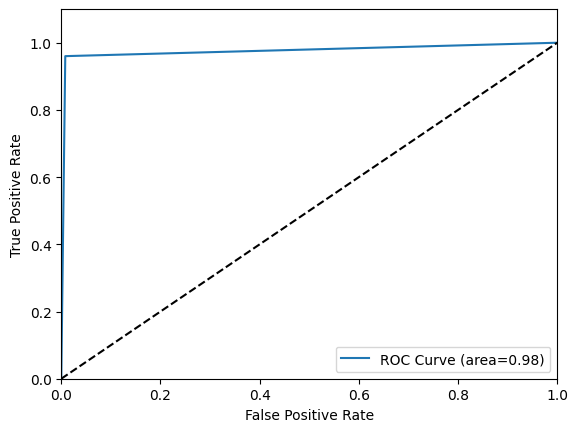

In [88]:
plt.plot(FP, TP, label = f"ROC Curve (area={round(auc_curve, 2)})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [89]:
# Will pass the user data manually to checkthe prediction of status are in our model

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [90]:
user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print("Lose")

Lose


In [91]:
import sklearn
print(sklearn.__version__)

1.7.2


In [92]:
# For now:-
# save the classification model by using pickle

import pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Now successfully saved our model in 'classification_model.pkl' pickle file
# Hereafter we can load and using this pickle file only to predict the status.
# (don't need any packages - only need numpy for pass user input)

In [93]:
# For Now:-
# load pickle model to predict the status (like Trained brain).

with open('/Users/viren_emmanuel/Desktop/IITM_PROJECTS/Industrial-Copper-Modeling-main/classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data=np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


# Regression Method - Predict Selling Price

In [94]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
import pickle

In [95]:
df_final

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,0.693147,6.749931,1,4,2021,1,7,2021
1,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,-0.223144,6.953684,1,4,2021,1,4,2021
2,30202938.0,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,0.405465,6.890609,1,4,2021,1,4,2021
3,30209509.0,30.0,2,5.0,41.0,1125.0,611993,1.259203,-0.967584,5.975038,1,4,2021,1,7,2021
4,30341428.0,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,4.629691,-0.040822,6.381816,2,7,2020,1,7,2020
181669,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,5.337954,-0.051293,6.378426,2,7,2020,1,7,2020
181670,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,1.443523,-0.342490,6.428105,2,7,2020,1,7,2020
181671,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,3.413291,-0.162519,6.398595,2,7,2020,1,7,2020


In [96]:
df_final.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [97]:
df_final['product_ref'].unique()

array([1670798778, 1668701718,     611993, 1668701376,  164141591,
           628377, 1671863738,     640665, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     640400, 1671876026,     628112,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579, 1665584662,
       1665584642,  929423819, 1665584320])

In [98]:
df_final['quantity tons_log'].unique()

array([3.991779  , 6.64382208, 5.41960836, ..., 5.33795371, 1.44352348,
       6.00804271], shape=(178009,))

In [99]:
df_final['application'].unique()

array([10., 41., 28., 15.,  4., 59., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67.,  3., 79., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [100]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    return accuracy_metrics

In [101]:
print(machine_learning_regression(df_final, DecisionTreeRegressor))
print(machine_learning_regression(df_final, ExtraTreesRegressor ))
print(machine_learning_regression(df_final, RandomForestRegressor))
print(machine_learning_regression(df_final, AdaBoostRegressor))
print(machine_learning_regression(df_final, GradientBoostingRegressor))
print(machine_learning_regression(df_final, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999209691265812, 'R2_test': 0.9247377810446039}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999209691265812, 'R2_test': 0.9543738411639952}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940501427151541, 'R2_test': 0.9573014891906093}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.6659993472583179, 'R2_test': 0.6643133290968684}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8874556400960653, 'R2_test': 0.8879235953834675}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9531842844593781, 'R2_test': 0.9474032155564325}


In [ ]:
# RandomForestRegressor and XGBRegressor both have good testing accuracy.
# So both models are strong, but XGB’s training accuracy suggests it’s slightly less likely to overfit compared to RF.
# RandomForestRegressor is good interpretability so i select the algorithm

In [102]:


x=  df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

param_grid_r = {'max_depth' : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features' : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [2, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [103]:

# bestpara meters for hypertuning therandomforestalgorithmforbetteraccuracy inun seen data
grid_search_r.best_params_,grid_search_r.best_score_

({'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 np.float64(0.9535314544109476))

In [104]:
# Pass the parameters andc heck the accuracy for both training and testing & overfitting

x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None,min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9865130846711478, 0.9561561063889339)

In [ ]:
# before hypertuning = 'algorithm': RandomForestRegressor' , 'R2_train': 'R2_train': 0.9940363763373592, 'R2_test': 0.9571749998158502
#comparebeforeandafterhypertuning,reduced the overfitting in training.


In [105]:
#predict  the selling price with hypertuning parameters and calculate the accuracy using matrics

x = df_final.drop(columns=['selling_price_log'],axis= 1)
y = df_final['selling_price_log']
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
             'Mean Absolute Error' :mae,
             'Mean_Squared_Error' : mse,
             'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.956148950633792,
 'Mean Absolute Error': 0.03234396283175519,
 'Mean_Squared_Error': 0.002887288758183959,
 'Root Mean Squared Error': np.float64(0.05373349754281736)}

In [106]:
# Manually passed the user input and predict the selling price

user_data = np.array([[30202938, 25, 1, 5, 41, 1210, 1668701718, 6.6, -0.2, 1, 4, 2021, 1, 4, 2021]])
y_pred = model.predict(user_data)
y_pred[0]  

np.float64(6.950146816121771)

In [107]:
# using Inverse Log Tronsformation to convert the value to original scale of the data (exp)
np.exp(y_pred[0])

np.float64(1043.3028906209038)

In [108]:
import sklearn
print(sklearn.__version__)

1.7.2


In [109]:

# save the regression model by using pickle

with open('regression_model.pkl','wb') as f:
    pickle.dump(model, f)

In [ ]:
# Now successfully saved our model in 'regression_model.pkl' pikle file.
# Hereafter we can load and using this pickle file onlytopredictthesellingprice.  
# (don't n ee  da n y packages only need numpy forpass us er input)

In [111]:

# Load the pickle model to predict selling price

with open('/Users/viren_emmanuel/Desktop/IITM_PROJECTS/Industrial-Copper-Modeling-main/regression_model.pkl','rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938, 25, 1, 5, 41, 1210, 1668701718, 6.6, -0.2, 1, 4, 2021, 1, 4, 2021]]))
np.exp(y_pred[0])

np.float64(1043.3028906209038)

10
